In [1]:
## profile_pic: Binary (1 if the profile has a picture, 0 otherwise).
###  ● nums/length username: Number of characters or numbers in the username.
###  ● fullname words: Number of words in the full name.
###  ● nums/length fullname: Character length and number count in the full name.
###  ● name==username: Binary (1 if the username and full name are identical, 0
###  otherwise).
###  ● description length: Character length of the bio/description.
###  ● external URL: Binary (1 if an external URL is present, 0 otherwise).
###  ● private: Binary (1 if the profile is private, 0 otherwise).
###  ● #posts: Number of posts.
###  ● #followers: Number of followers.
###  ● #follows: Number of accounts followed.
###  ● fake: Target label (1 if fake, 0 if genuine).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv("train.csv")
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [4]:
## clean the columns name 

data = data.rename({"#followers":"followers"},axis=1)
data = data.rename({"#follows":"follows"},axis=1)
data = data.rename({"#posts":"posts"},axis=1)
data = data.rename({"nums/length username":"length_username"},axis=1)
data = data.rename({"nums/length fullname":"length_fullname"},axis=1)
data = data.rename({"name==username":"name_edual_username"},axis=1)

In [5]:
data.head()

,profile pic,length_username,fullname words,length_fullname,name_edual_username,description length,external URL,private,posts,followers,follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [6]:
data.to_csv("clean_data.csv")

In [7]:
data.columns

Index(['profile pic', 'length_username', 'fullname words', 'length_fullname',
       'name_edual_username', 'description length', 'external URL', 'private',
       'posts', 'followers', 'follows', 'fake'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   profile pic          576 non-null    int64  
 1   length_username      576 non-null    float64
 2   fullname words       576 non-null    int64  
 3   length_fullname      576 non-null    float64
 4   name_edual_username  576 non-null    int64  
 5   description length   576 non-null    int64  
 6   external URL         576 non-null    int64  
 7   private              576 non-null    int64  
 8   posts                576 non-null    int64  
 9   followers            576 non-null    int64  
 10  follows              576 non-null    int64  
 11  fake                 576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [9]:
data.describe()

,profile pic,length_username,fullname words,length_fullname,name_edual_username,description length,external URL,private,posts,followers,follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [10]:
data.isnull().sum()

profile pic            0
length_username        0
fullname words         0
length_fullname        0
name_edual_username    0
description length     0
external URL           0
private                0
posts                  0
followers              0
follows                0
fake                   0
dtype: int64

In [11]:
data.duplicated().any()

np.True_

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
X = data.drop('fake', axis=1)
y = data['fake']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
print("\n--- Model Training (Random Forest) ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True, max_depth=10)


--- Model Training (Random Forest) ---


In [17]:
rf_model.fit(X_train_scaled, y_train)
print("Random Forest model training complete.")
print(f"Out-of-Bag Score: {rf_model.oob_score_:.4f}")

Random Forest model training complete.
Out-of-Bag Score: 0.9085


In [18]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [19]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [21]:
print("Random Forest Model Evaluation")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(class_report_rf)

Random Forest Model Evaluation
Accuracy: 0.9304

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        58
           1       0.95      0.91      0.93        57

    accuracy                           0.93       115
   macro avg       0.93      0.93      0.93       115
weighted avg       0.93      0.93      0.93       115



Random Forest confusion matrix saved as 'confusion_matrix_rf.png'.


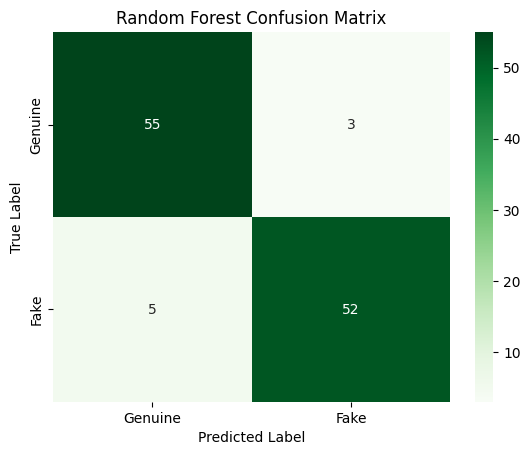

In [23]:
# plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Genuine', 'Fake'], yticklabels=['Genuine', 'Fake'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_rf.png')
print("Random Forest confusion matrix saved as 'confusion_matrix_rf.png'.")

In [24]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)


In [25]:
print("Feature Importance")
print(feature_importance_df)

Feature Importance
                Feature  Importance
9             followers    0.288683
8                 posts    0.240907
1       length_username    0.130500
0           profile pic    0.121015
10              follows    0.074808
5    description length    0.067255
2        fullname words    0.051344
7               private    0.010356
3       length_fullname    0.006960
6          external URL    0.005716
4   name_edual_username    0.002457


Feature importance plot saved as 'feature_importance.png'.


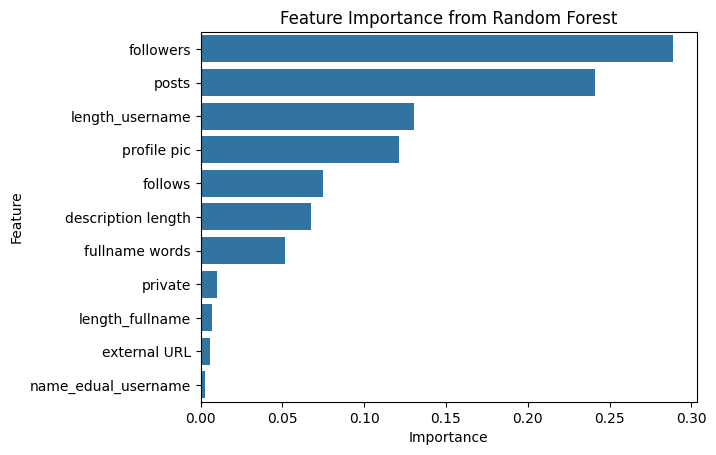

In [27]:
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.savefig('feature_importance.png')
print("Feature importance plot saved as 'feature_importance.png'.")